# Category Products Scraper

### In this Assignment I will sepreate solution to several steps
> <ul>
    <li>Find The URL that i want to scrape</li>
    <li>Inpect the Page</li>
    <li>Find wanted Data</li>
    <li>Write The Code</li>
    <li>Execute the code and save data in acceptable Format</li>
</ul> 

### 1) Find The URL that i want to scrape

>in this assignment, I will use this link: [Link](https://www.bol.com/nl/nl/l/audio-hifi/10714/) OR Page to get wanted data.

### 2) Inspect The Page to Find Needed Data

>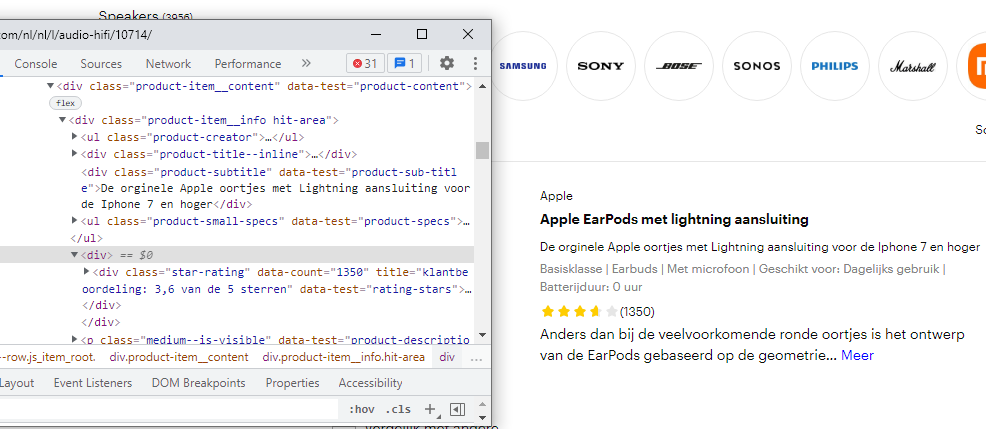

### 3) Find needed Data

>Needed Data in This Assignment is:
    <ul>
        <li>Title</li>
        <li>Brand</li>
        <li>Rating</li>
        <li>Number of Reviews</li>
        <li>Link of this Product</li>
        <li>Price</li>
        <li>Currency</li>
        <li>Category Name</li>
    </ul>

### 4) Write The Code

In [1]:
import requests
from parsel import Selector
import pandas as pd
import os.path

In [2]:
class Scraper:
    _proxies = [
         'http://139.99.237.62:80',
         'http://101.53.158.48:9200',
        'http://41.65.103.7:1976',
        'http://41.33.66.242:34561',
        'http://41.65.251.87:1981',
        'http://154.236.177.100:1981',
        'http://41.65.46.178:1981',
        'http://45.182.190.146:999',
        'http://190.85.115.78:3128'   
    ]
    def connection(self,link):
        connectionStatus = False
        currentProxie = 0
        while(connectionStatus == False):      
            try:
                _headers = {'user-agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.93 Safari/537.36'}
                content = str(requests.get(link,proxies={"http":self._proxies[currentProxie]},headers=_headers).content)
                print("Connection Done:"+self._proxies[currentProxie])
                currentProxie =(currentProxie+1)%len(self._proxies)
                connectionStatus = True
            except OSError as e:
                print("Connection Failed at Proxie Numer: "+str(currentProxie+1))
                print("Error:"+str(e))
                currentProxie =(currentProxie+1)%len(self._proxies)
        selector = Selector(text=content)
        return selector
        
    def __init__(self,link):  
        selector = self.connection(link)
        self.getNumPages = int(selector.xpath('//div[@id="js_pagination_control"]//ul[@class="pagination"]/li[last()-1]/a/text()').get())
    
    def getDataFromPage(self,selector):
        # Get Category Name
        category_name = selector.xpath('/html/body/div/main/wsp-async-browse/div/div/div[3]/div[3]/div[1]/div/div[1]/h1/text()').get()
        print(category_name)
        # get Products
        products = selector.xpath('//div[@data-group-name="'+category_name+'"]/ul/li')
        self.category_name = [category_name for i in range(0,len(products))]
        self.title=[]
        self.brand=[]
        self.rating=[]
        self.n_reviews=[]
        self.url=[]
        self.currency=['€' for i in range(0,len(products))]
        self.price=[]
        print(len(products))


        for prodCounter in range(1,len(products)+1):
            self.title.append(selector.xpath('//div[@data-group-name="'+category_name+'"]/ul/li['+str(prodCounter)+']'+'//div[@class="product-item__content"]//div[@class="product-item__info hit-area"]//div[@class="product-title--inline"]/a/text()').get())

            self.brand.append(selector.xpath('//div[@data-group-name="'+category_name+'"]/ul/li['+str(prodCounter)+']'+'//div[@class="product-item__content"]//div[@class="product-item__info hit-area"]//ul[@class="product-creator"]/li/a/text()').get())

            self.url.append(selector.xpath('//div[@data-group-name="'+category_name+'"]/ul/li['+str(prodCounter)+']'+'//div[@class="product-item__content"]//div[@class="product-item__info hit-area"]//div[@class="product-title--inline"]/a/@href').get())

            _rate = selector.xpath('//div[@data-group-name="'+category_name+'"]/ul/li['+str(prodCounter)+']'+'//div[@class="product-item__content"]//div[@class="product-item__info hit-area"]//div//div[@class="star-rating"]/@title').get().split(" ")[1]
            _rate = float(_rate.replace(',','.'))if _rate.isalpha()==False else 0.0
            self.rating.append(_rate)

            _n_reviews = selector.xpath('//div[@data-group-name="'+category_name+'"]/ul/li['+str(prodCounter)+']'+'//div[@class="product-item__content"]//div[@class="product-item__info hit-area"]//div//div[@class="star-rating"]/@data-count').get()
            _n_reviews = 0 if _n_reviews==None or _n_reviews.isalpha()==True else int(_n_reviews)
            self.n_reviews.append(_n_reviews)

            _price = selector.xpath('//div[@data-group-name="'+category_name+'"]/ul/li['+str(prodCounter)+']'+'//div[@class="product-item__content"]//wsp-buy-block[@class="product-item__options hit-area"]//div[@class="product-prices "]//section[@data-test="priceBlock"]//div//div/meta/@content').get()
            _price = float(_price)if _price!=None else 0.0
            self.price.append(_price)
        self.generateCSVFile(category_name)

    def generateCSVFile(self,fileName):
        print(self.brand)
        if self.category_name ==None or self.brand==None or self.title==None or self.rating==None or self.n_reviews==None or self.url==None or self.currency==None or self.price==None:
            raise ValueError("You must get data First")
        df = pd.DataFrame({'category name':self.category_name,'Brand':self.brand,'Title':self.title,'Rating':self.rating,'number reviews':self.n_reviews,'URL':self.url,'Price':self.price,'Currency':self.currency}) 
        if os.path.isfile(fileName+'.csv'):
            df.to_csv(fileName+'.csv',mode='a', index=False, encoding='utf-8',header=False)
        else:
            df.to_csv(fileName+'.csv', index=False, encoding='utf-8')

    def main(self,numPages,link):
        if self.getNumPages < numPages:
            raise ValueError("You entered wrong number!")
        for currentPage in range(1,numPages+1):
            selector = self.connection(link+'?page='+str(currentPage))
            print(link+'?page='+str(currentPage))
            self.getDataFromPage(selector)
        

In [3]:
audio = Scraper('https://www.bol.com/nl/nl/l/audio-hifi/10714/')
audio.getNumPages
audio.main(2,'https://www.bol.com/nl/nl/l/audio-hifi/10714/')

Muziekinstrumenten = Scraper('https://www.bol.com/nl/nl/l/muziekinstrumenten/43380/')
Muziekinstrumenten.getNumPages
audio.main(2,'https://www.bol.com/nl/nl/l/muziekinstrumenten/43380/')

Connection Done:http://139.99.237.62:80
Connection Done:http://139.99.237.62:80
https://www.bol.com/nl/nl/l/audio-hifi/10714/?page=1
Audio & Hifi
30
['Apple', 'Jabra', 'Fresh n Rebel', 'JBL', 'Apple', 'Apple', 'Apple', 'Google Nest', 'Apple', 'Sony', 'JBL', 'Google Nest', 'Google Nest', 'RYTMZ\\xc2\\xae', 'Jabra', 'JBL', 'Google Nest', 'Apple', 'JBL', 'Google Nest', 'JBL', 'Wegman', 'DistinQ', 'Samsung', 'JBL', 'Philips', 'Hoco', 'JBL', 'Fresh n Rebel', 'Fresh n Rebel']
Connection Done:http://139.99.237.62:80
https://www.bol.com/nl/nl/l/audio-hifi/10714/?page=2
Audio & Hifi
29
['Google Nest', 'Jabra', 'Fresh n Rebel', 'Rolfstone', 'JBL', 'JBL', 'Samsung', 'Sonos', 'Sonos', 'JBL', 'WT-858', 'LifeGoods', 'VTech', 'Philips', 'RYTMZ\\xc2\\xae', 'JBL', 'Sony', 'Sony', 'Yapa Electronics', 'Samsung', 'Sonos', 'Samsung', 'Sony', 'Sony', 'Merkloos', 'BTH', 'Mossmedia', 'Jabra', 'Fresh n Rebel']
Connection Done:http://139.99.237.62:80
Connection Done:http://139.99.237.62:80
https://www.bol.com/n

In [4]:
#old Solution
url = 'https://www.bol.com/nl/nl/l/audio-hifi/10714/'
proxies = {
'http': 'http://45.128.220.183:59394',
'https': 'http://45.128.220.183:59394',
}
content = requests.get(url).text
selector = Selector(text=content)

In [5]:
getNumPages = selector.xpath('//div[@id="js_pagination_control"]//ul[@class="pagination"]/li[last()-1]/a/text()').get()

In [6]:
def getDataFromPage(selector):
    # Get Category Name
    category_name = selector.xpath('/html/body/div/main/wsp-async-browse/div/div/div[3]/div[3]/div[1]/div/div[1]/h1/text()').get()

    # get Products
    products = selector.xpath('//div[@data-group-name="Audio & Hifi"]/ul/li')
    category_name = [category_name for i in range(1,len(products)+1)]
    title=[]
    brand=[]
    rating=[]
    n_reviews=[]
    url=[]
    currency=[]


    for prodCounter in range(1,len(products)+1):
        title.append(selector.xpath('//div[@data-group-name="Audio & Hifi"]/ul/li['+str(prodCounter)+']'+'//div[@class="product-item__content"]//div[@class="product-item__info hit-area"]//div[@class="product-title--inline"]/a/text()').get())

        brand.append(selector.xpath('//div[@data-group-name="Audio & Hifi"]/ul/li['+str(prodCounter)+']'+'//div[@class="product-item__content"]//div[@class="product-item__info hit-area"]//ul[@class="product-creator"]/li/a/text()').get())

        url.append(selector.xpath('//div[@data-group-name="Audio & Hifi"]/ul/li['+str(prodCounter)+']'+'//div[@class="product-item__content"]//div[@class="product-item__info hit-area"]//div[@class="product-title--inline"]/a/@href').get())

        _rate = selector.xpath('//div[@data-group-name="Audio & Hifi"]/ul/li['+str(prodCounter)+']'+'//div[@class="product-item__content"]//div[@class="product-item__info hit-area"]//div//div[@class="star-rating"]/@title').get().split(" ")[1]
        _rate = float(_rate.replace(',','.'))if _rate.isalpha()==False else 0.0
        rating.append(_rate)

        _n_reviews = selector.xpath('//div[@data-group-name="Audio & Hifi"]/ul/li['+str(prodCounter)+']'+'//div[@class="product-item__content"]//div[@class="product-item__info hit-area"]//div//div[@class="star-rating"]/@data-count').get()
        _n_reviews = 0 if _n_reviews==None or _n_reviews.isalpha()==True else int(_n_reviews)
        n_reviews.append(_n_reviews)

        _currency = selector.xpath('//div[@data-group-name="Audio & Hifi"]/ul/li['+str(prodCounter)+']'+'//div[@class="product-item__content"]//wsp-buy-block[@class="product-item__options hit-area"]//div[@class="product-prices "]//section[@data-test="priceBlock"]//div//div/meta/@content').get()
        _currency = float(_currency)if _currency!=None else 0.0
        currency.append(_currency)

    df = pd.DataFrame({'category name':category_name,'Brand':brand,'Title':title,'Rating':rating,'number reviews':n_reviews,'URL':url,'Currency':currency}) 
    df.to_csv('products.csv',mode='a', index=False, encoding='utf-8',header=False)


In [7]:
def main(numPages):
    currentProxie = 0
    for currentPage in range(1,numPages+1):
        url = 'https://www.bol.com/nl/nl/l/audio-hifi/10714/?page='+str(currentPage)
        _proxies = [
         'http://139.99.237.62:80',
         'http://101.53.158.48:9200',
        'http://41.65.103.7:1976',
        'http://41.33.66.242:34561',
        'http://41.65.251.87:1981',
        'http://154.236.177.100:1981',
        'http://41.65.46.178:1981',
        'http://45.182.190.146:999',
        'http://190.85.115.78:3128'   
        ]
        connectionStatus = False
        while(connectionStatus == False):      
            try:
                content = requests.get(url,proxies={"http":_proxies[currentProxie]}).text
                print("Connection Done:"+_proxies[currentProxie])
                currentProxie =(currentProxie+1)%len(_proxies)
                connectionStatus = True
            except OSError as e:
                print("Connection Failed at Proxie Numer: "+str(currentProxie+1))
                print("Error:"+e)
                currentProxie =(currentProxie+1)%len(_proxies)
        selector = Selector(text=content)
        getDataFromPage(selector)        

In [8]:
main(3)

Connection Done:http://139.99.237.62:80
Connection Done:http://101.53.158.48:9200
Connection Done:http://41.65.103.7:1976
